### New code

### Load Dataset & Handle Missing Values

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scipy.stats as stats
from xgboost import XGBClassifier

In [4]:
# Load dataset
df = pd.read_csv("Myocardial Infarction.csv")
df



,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [5]:
# Display column names to identify target variable
print("Column Names:", df.columns.tolist())


Column Names: ['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter

In [6]:
df.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


- df.head(): View first few rows

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


- df.info(): Check data types and missing values

In [10]:
df.describe()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1700.000000,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,850.500000,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,...,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,490.892045,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,...,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,425.750000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,850.500000,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1275.250000,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1700.000000,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


- df.describe(): Summary statistics for continuous columns

In [12]:
print(df.head())

   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   
4         0.0  ...          0           0         0          0       0   

   DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0         0    0       0          0       0  


In [13]:
print(df.tail())

        ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL  \
1695  1696  77.0    0       0.0        4.0        2.0       1.0       NaN   
1696  1697  70.0    0       0.0        6.0        2.0       1.0       NaN   
1697  1698  55.0    1       3.0        6.0        2.0       2.0       NaN   
1698  1699  79.0    0       2.0        2.0        2.0       1.0       NaN   
1699  1700  63.0    1       2.0        NaN        NaN       NaN       NaN   

       GB  SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  \
1695  2.0         0.0  ...          0           0         1          0   
1696  2.0         0.0  ...          0           0         0          0   
1697  0.0         0.0  ...          0           0         0          0   
1698  2.0         0.0  ...          0           0         0          1   
1699  2.0         0.0  ...          0           0         0          0   

      RAZRIV  DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
1695       1         0    0       0

In [14]:
# Fill missing values with median
df.fillna(df.median(), inplace=True)
df


,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,0.0,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


### Identify Numerical & Categorical Columns

In [16]:
# Identify numerical & categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numerical Columns: ['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fib

- Separate numerical (integer/float) and categorical (object/string) columns.
- Further, classify numerical columns into discrete and continuous based on their unique values.

### Identify Discrete & Continuous Numerical Columns

In [19]:
# Separate numerical columns into discrete and continuous
discrete_cols = [col for col in num_cols if df[col].nunique() < 20]  # Less than 20 unique values
continuous_cols = [col for col in num_cols if df[col].nunique() >= 20]  # 20+ unique values

print("Discrete Numerical Columns:", discrete_cols)
print("Continuous Numerical Columns:", continuous_cols)


Discrete Numerical Columns: ['SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'f

###  Boxplot & Histogram for Continuous Columns 
- more than 10 we can treat as continuous

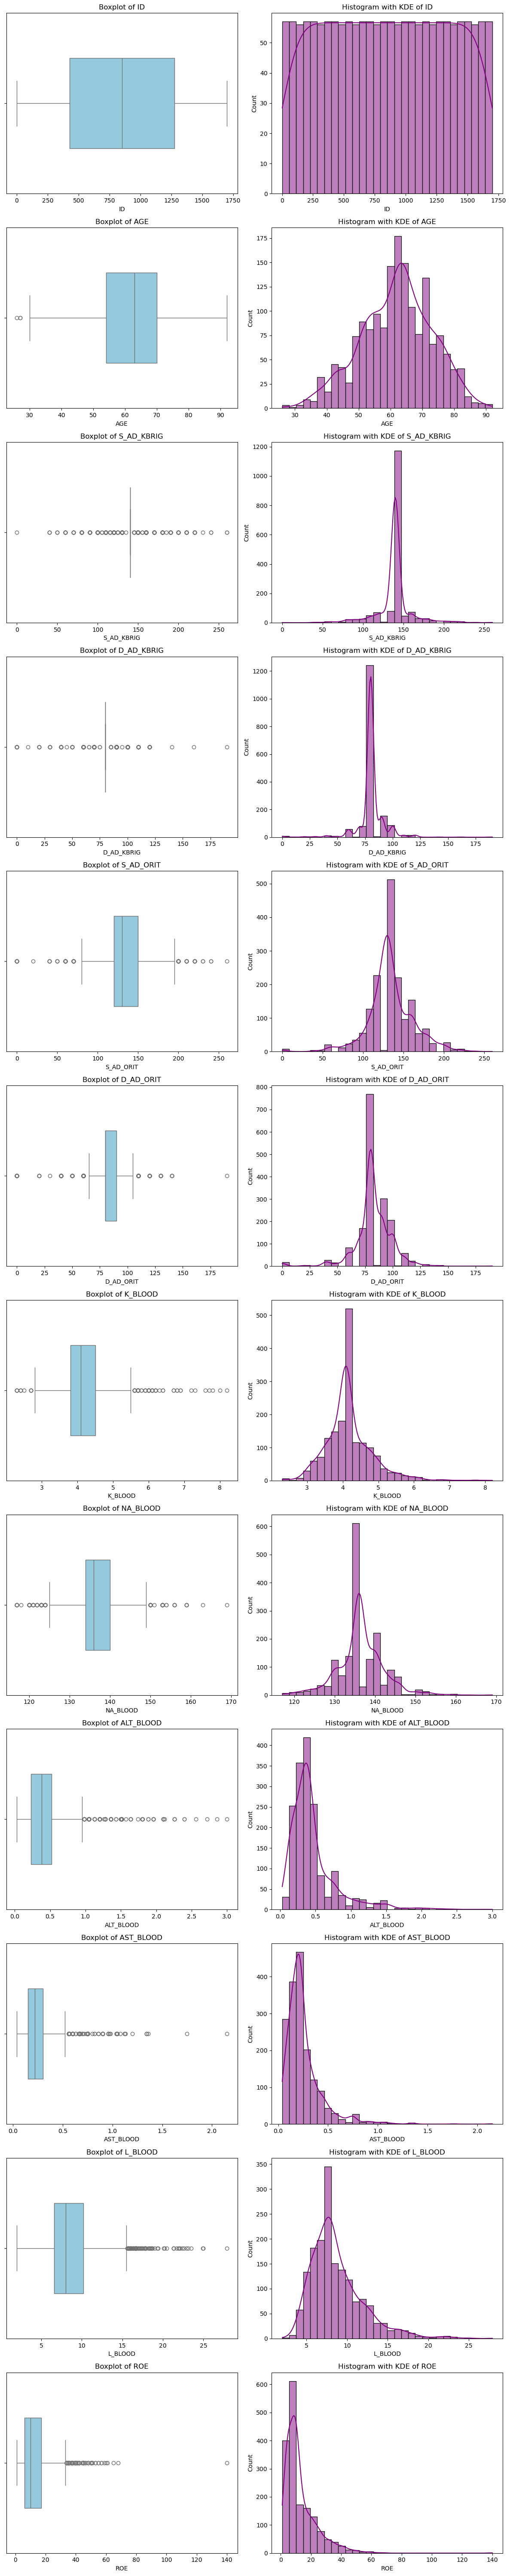

In [21]:
# Boxplot & Histogram for continuous numerical columns
fig, axes = plt.subplots(len(continuous_cols), 2, figsize=(12, 5 * len(continuous_cols)))

for i, col in enumerate(continuous_cols):
    sns.boxplot(data=df[col], ax=axes[i, 0], color='skyblue', width=0.5, orient='h')
    axes[i, 0].set_title(f"Boxplot of {col}")

    sns.histplot(df[col], kde=True, ax=axes[i, 1], color='purple', bins=30)
    axes[i, 1].set_title(f"Histogram with KDE of {col}")

plt.tight_layout()
plt.show()


- Boxplot & Histogram: Helps detect outliers and visualize data distribution.

### Heatmap
- Heatmap: Shows correlations between numerical features.

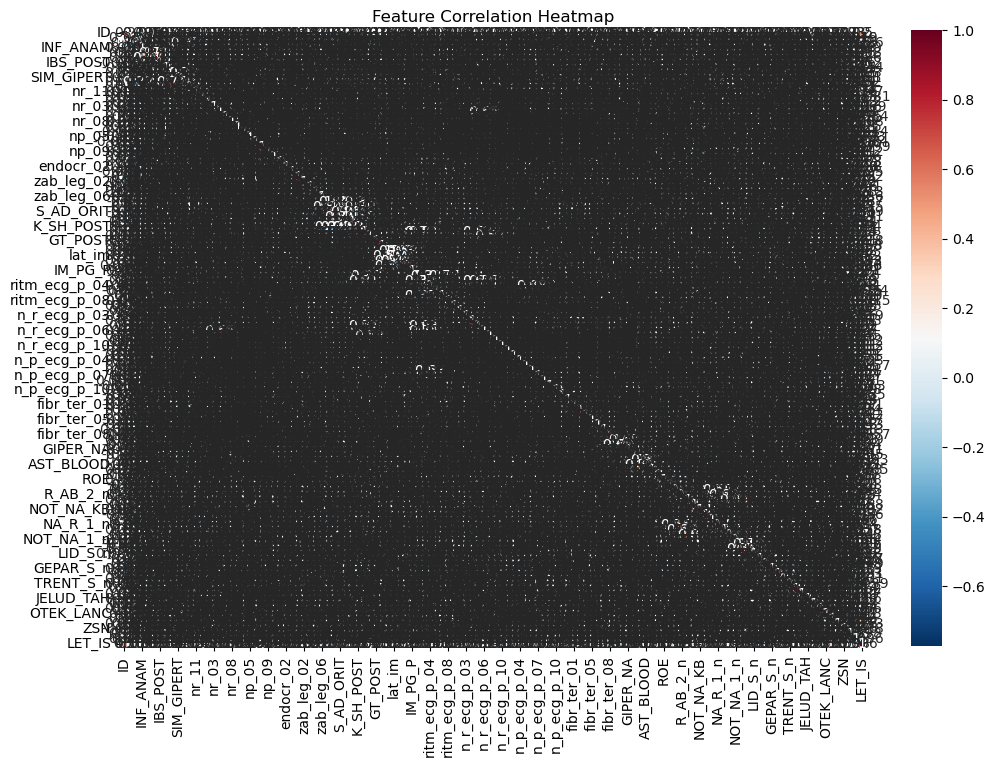

In [24]:
# Selecting only numerical columns for correlation
df_numeric = df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='RdBu_r', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## Q - Q plot

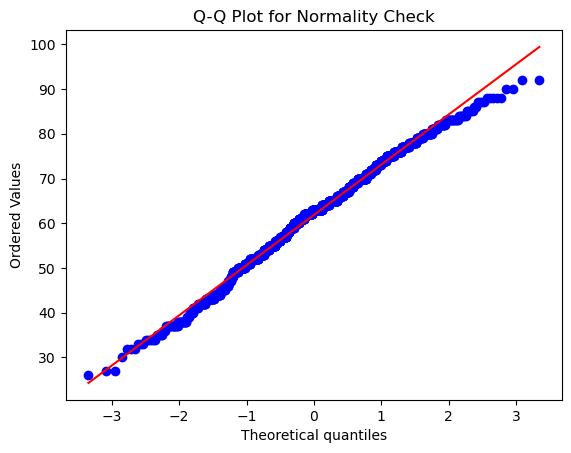

In [26]:
numerical_column = df["AGE"]  
# Q-Q Plot
stats.probplot(numerical_column, dist="norm", plot=plt)
plt.title("Q-Q Plot for Normality Check")
plt.show()

### One-Hot Encoding for Categorical Columns

In [28]:
# Apply One-Hot Encoding for Categorical Columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Data Shape After Encoding:", df_encoded.shape)


Data Shape After Encoding: (1700, 124)


- Converts categorical variables into numerical format.

### Define Features & Target Variable

In [31]:
# Define features (X) and target variable (y)
target_column = "LET_IS"  # Update based on dataset
if target_column not in df_encoded.columns:
    raise KeyError(f"Column '{target_column}' not found in dataset. Please update the column name.")

X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

print("Feature Set Shape:", X.shape)
print("Target Set Shape:", y.shape)


Feature Set Shape: (1700, 123)
Target Set Shape: (1700,)


### Handle Imbalanced Data

In [33]:
# Handle Imbalanced Data Using Upsampling
df_balanced = pd.concat([X, y], axis=1)

majority_class = df_balanced[df_balanced[target_column] == 0]
minority_class = df_balanced[df_balanced[target_column] == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine balanced dataset
df_balanced = pd.concat([majority_class, minority_upsampled])

# Split dataset again
X = df_balanced.drop(columns=[target_column])
y = df_balanced[target_column]
df_balanced

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1554,60.0,1,1.0,3.0,2.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1504,1505,74.0,0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1575,1576,70.0,1,1.0,1.0,2.0,1.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1682,1683,61.0,0,1.0,5.0,2.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1


### Train-Test Split & Feature Scaling

In [35]:
# Split dataset into train-test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (for continuous variables)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (2286, 123)
Testing Set Shape: (572, 123)


- **Train-Test Split:** Splits the dataset into training (80%) and testing (20%) sets.

### Train Random Forest Model

In [38]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Model Trained Successfully!")


Random Forest Model Trained Successfully!


In [39]:
print(rf_model)


RandomForestClassifier(random_state=42)


- if it returns the above one then we can say that our model is trained

In [41]:
print("Feature Importance:\n", rf_model.feature_importances_)


Feature Importance:
 [3.88604525e-01 2.16855950e-02 6.08596110e-03 7.85440692e-03
 1.84673530e-02 1.60245011e-02 7.76596023e-03 6.78375415e-05
 4.82203921e-03 7.34200756e-04 6.96739385e-03 2.72447078e-03
 9.49904444e-04 2.92930888e-05 4.88146524e-05 1.21762808e-03
 1.44874354e-04 0.00000000e+00 3.29263116e-05 0.00000000e+00
 6.82166096e-05 1.23956154e-04 0.00000000e+00 0.00000000e+00
 2.68085681e-05 3.23175100e-05 3.63345203e-03 1.64839607e-03
 1.99943711e-04 8.83177606e-04 1.04378059e-03 1.18593919e-03
 2.27594515e-04 4.22640611e-04 1.55828511e-02 1.86138358e-02
 5.30890731e-02 6.66401252e-02 4.11791430e-03 2.82102229e-02
 9.98891674e-04 1.39953526e-04 4.04642321e-05 4.34657421e-04
 4.40496037e-03 3.94732572e-03 4.24952045e-03 1.39513162e-03
 3.14055369e-03 1.87879050e-02 1.44137114e-03 1.45146624e-03
 0.00000000e+00 9.08646110e-03 5.60577844e-04 1.50186242e-03
 7.90516925e-05 1.25966521e-03 1.06965871e-03 2.72213253e-04
 5.75283542e-04 8.37183873e-05 5.00145492e-05 1.55208432e-05
 7.

## check model predictions

In [122]:
y_testpred = rf_model.predict(X_test)
print("Predictions:\n", y_testpred[:10])  # Display first 10 predictions


Predictions:
 [1 1 0 1 0 0 1 1 1 1]


In [44]:
y_prob = rf_model.predict_proba(X_test)
print("Prediction Probabilities:\n", y_prob[:5])  # Show first 5 probabilities


Prediction Probabilities:
 [[0.   1.  ]
 [0.   1.  ]
 [0.98 0.02]
 [0.   1.  ]
 [0.99 0.01]]


### Evaluate model performance

In [124]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_testpred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9983


## checking classification report

In [126]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_testpred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       283

    accuracy                           1.00       572
   macro avg       1.00      1.00      1.00       572
weighted avg       1.00      1.00      1.00       572



#### Model Training

In [128]:

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predictions


In [136]:
# Make predictions
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print(y_test_pred )
print(y_train_pred)


[1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0
 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0
 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0
 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1
 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1
 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1
 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1
 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1
 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1
 0 1 0 0 0 1 1 1 0 1 1 1 

### Accuracy Evaluation

In [132]:
# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")

Test Accuracy: 0.9983
Train Accuracy: 1.0000


###  Classification Report

In [138]:
# Print classification reports
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))

Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       283

    accuracy                           1.00       572
   macro avg       1.00      1.00      1.00       572
weighted avg       1.00      1.00      1.00       572

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1140
           1       1.00      1.00      1.00      1146

    accuracy                           1.00      2286
   macro avg       1.00      1.00      1.00      2286
weighted avg       1.00      1.00      1.00      2286



### Confusion Matrices

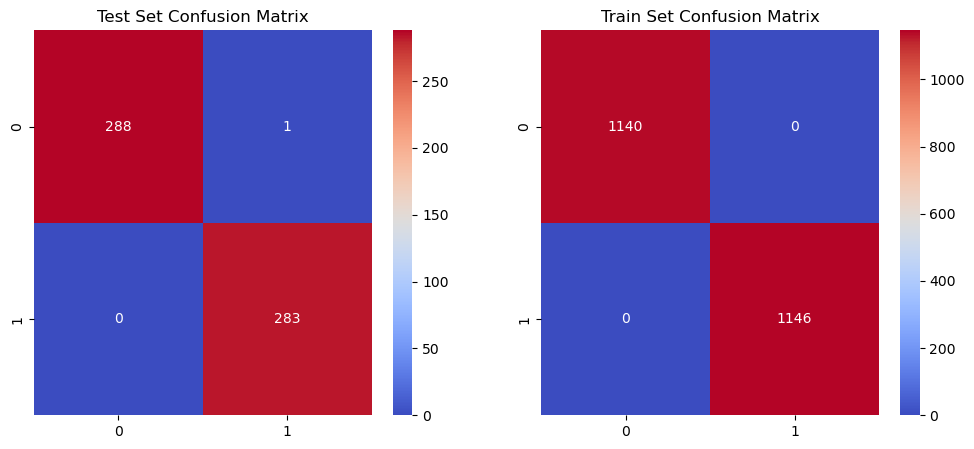

In [140]:
# Plot confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Test Set Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Train Set Confusion Matrix")

plt.show()

### Data Splitting & Scaling

In [167]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)


[[ 0.90593537 -0.32086947 -1.14211886 ... -0.39977162  2.69308514
  -0.23120601]
 [ 0.60143569  0.62267003 -1.14211886 ... -0.39977162 -0.37132135
  -0.23120601]
 [-0.94433656  1.00008583 -1.14211886 ... -0.39977162 -0.37132135
  -0.23120601]
 ...
 [-0.01532162  0.90573188  0.87556562 ... -0.39977162 -0.37132135
  -0.23120601]
 [ 0.30275448 -0.03780762  0.87556562 ... -0.39977162 -0.37132135
  -0.23120601]
 [-0.53898349 -0.50957737  0.87556562 ...  2.50142816 -0.37132135
  -0.23120601]]
[[ 0.96218054  0.33960818 -1.14211886 ... -0.39977162  2.69308514
  -0.23120601]
 [ 1.01066775  0.62267003 -1.14211886 ... -0.39977162 -0.37132135
  -0.23120601]
 [-0.70965847  0.62267003 -1.14211886 ...  2.50142816 -0.37132135
  -0.23120601]
 ...
 [-1.71819244 -1.35876292 -1.14211886 ... -0.39977162 -0.37132135
  -0.23120601]
 [ 1.0184257  -0.60393132  0.87556562 ... -0.39977162 -0.37132135
  -0.23120601]
 [ 0.5335536  -0.60393132  0.87556562 ... -0.39977162  2.69308514
  -0.23120601]]


#### Train Random Forest Model

In [153]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_test_pred_rf = rf_model.predict(X_test)
y_train_pred_rf = rf_model.predict(X_train)

# Accuracy
rf_test_acc = accuracy_score(y_test, y_test_pred_rf)
rf_train_acc = accuracy_score(y_train, y_train_pred_rf)

print(f"Random Forest - Test Accuracy: {rf_test_acc:.4f}")
print(f"Random Forest - Train Accuracy: {rf_train_acc:.4f}")


Random Forest - Test Accuracy: 0.9983
Random Forest - Train Accuracy: 1.0000


#### Train XGBoost Model

In [155]:
# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_test_pred_xgb = xgb_model.predict(X_test)
y_train_pred_xgb = xgb_model.predict(X_train)

# Accuracy
xgb_test_acc = accuracy_score(y_test, y_test_pred_xgb)
xgb_train_acc = accuracy_score(y_train, y_train_pred_xgb)

print(f"XGBoost - Test Accuracy: {xgb_test_acc:.4f}")
print(f"XGBoost - Train Accuracy: {xgb_train_acc:.4f}")


C:\Users\akula\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:28:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Test Accuracy: 0.9983
XGBoost - Train Accuracy: 1.0000


#### Compare Models & Select the Best

In [157]:
# Print accuracy comparison
print("\nModel Performance Comparison:")
print(f"Random Forest - Test Accuracy: {rf_test_acc:.4f}")
print(f"XGBoost - Test Accuracy: {xgb_test_acc:.4f}")

# Choose the best model
best_model = "Random Forest" if rf_test_acc > xgb_test_acc else "XGBoost"
print(f"\nBest Model: {best_model}")



Model Performance Comparison:
Random Forest - Test Accuracy: 0.9983
XGBoost - Test Accuracy: 0.9983

Best Model: XGBoost


#### Plot Confusion Matrices

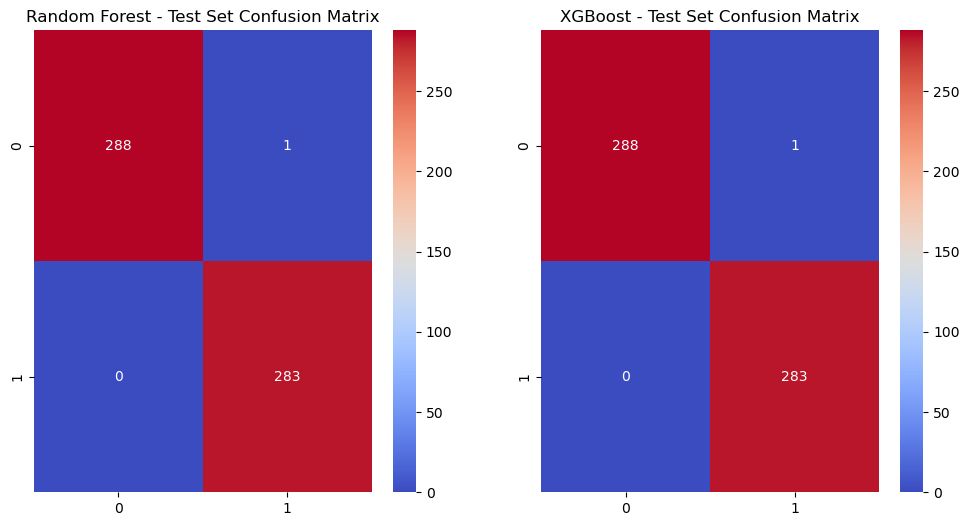

In [159]:
plt.figure(figsize=(12, 6))

# Random Forest Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_test_pred_rf), annot=True, fmt='d', cmap='coolwarm')
plt.title("Random Forest - Test Set Confusion Matrix")

# XGBoost Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_test_pred_xgb), annot=True, fmt='d', cmap='coolwarm')
plt.title("XGBoost - Test Set Confusion Matrix")

plt.show()


#### Print Classification Reports

In [161]:
print("Random Forest - Classification Report:\n", classification_report(y_test, y_test_pred_rf))
print("XGBoost - Classification Report:\n", classification_report(y_test, y_test_pred_xgb))


Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       283

    accuracy                           1.00       572
   macro avg       1.00      1.00      1.00       572
weighted avg       1.00      1.00      1.00       572

XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       283

    accuracy                           1.00       572
   macro avg       1.00      1.00      1.00       572
weighted avg       1.00      1.00      1.00       572



### Cross-Validation 

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Score: {scores.mean():.4f}")


Cross-Validation Scores: [1.         1.         1.         1.         0.84238179]
Mean Score: 0.9685


### Final Confirmation

In [52]:
print("Baseline Accuracy:", max(y_test.mean(), 1 - y_test.mean()))

Baseline Accuracy: 0.5052447552447552


In [53]:
#X_train = X_train.dropna()
#y_train = y_train.loc[X_train.index]  # Keep labels aligned

#X_test = X_test.dropna()
#y_test = y_test.loc[X_test.index]  # Keep labels aligned


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_pred):.4f}")


Logistic Regression Accuracy: 0.9860


In [55]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # You can use "median" or "most_frequent" too
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
print("X_train:" ,X_train)
print("X_test:" ,X_test)


X_train: [[ 0.90593537 -0.32086947 -1.14211886 ... -0.39977162  2.69308514
  -0.23120601]
 [ 0.60143569  0.62267003 -1.14211886 ... -0.39977162 -0.37132135
  -0.23120601]
 [-0.94433656  1.00008583 -1.14211886 ... -0.39977162 -0.37132135
  -0.23120601]
 ...
 [-0.01532162  0.90573188  0.87556562 ... -0.39977162 -0.37132135
  -0.23120601]
 [ 0.30275448 -0.03780762  0.87556562 ... -0.39977162 -0.37132135
  -0.23120601]
 [-0.53898349 -0.50957737  0.87556562 ...  2.50142816 -0.37132135
  -0.23120601]]
X_test: [[ 0.96218054  0.33960818 -1.14211886 ... -0.39977162  2.69308514
  -0.23120601]
 [ 1.01066775  0.62267003 -1.14211886 ... -0.39977162 -0.37132135
  -0.23120601]
 [-0.70965847  0.62267003 -1.14211886 ...  2.50142816 -0.37132135
  -0.23120601]
 ...
 [-1.71819244 -1.35876292 -1.14211886 ... -0.39977162 -0.37132135
  -0.23120601]
 [ 1.0184257  -0.60393132  0.87556562 ... -0.39977162 -0.37132135
  -0.23120601]
 [ 0.5335536  -0.60393132  0.87556562 ... -0.39977162  2.69308514
  -0.23120601]]

In [56]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Model Accuracy: 0.9965


### Model Evaluation

In [58]:
# Make Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy Score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=1))


Random Forest Model Accuracy: 0.9983
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       283

    accuracy                           1.00       572
   macro avg       1.00      1.00      1.00       572
weighted avg       1.00      1.00      1.00       572



### Confusion Matrix

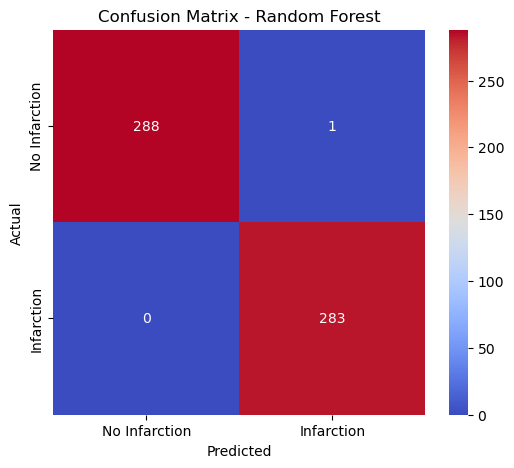

In [60]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='coolwarm', xticklabels=["No Infarction", "Infarction"], yticklabels=["No Infarction", "Infarction"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


### Feature Importance

C:\Users\akula\AppData\Local\Temp\ipykernel_18468\2767683342.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="magma")


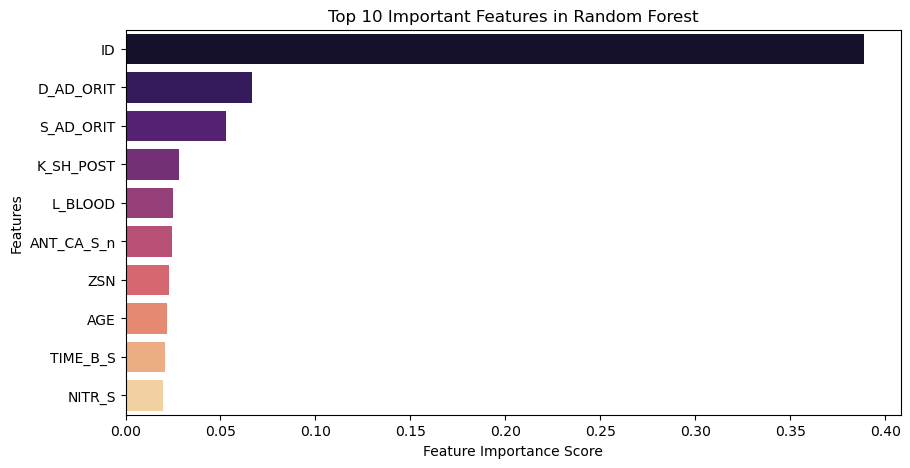

In [62]:
# Feature Importance Plot
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="magma")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Random Forest")
plt.show()


### Detect Outliers (Box Plot & Histogram

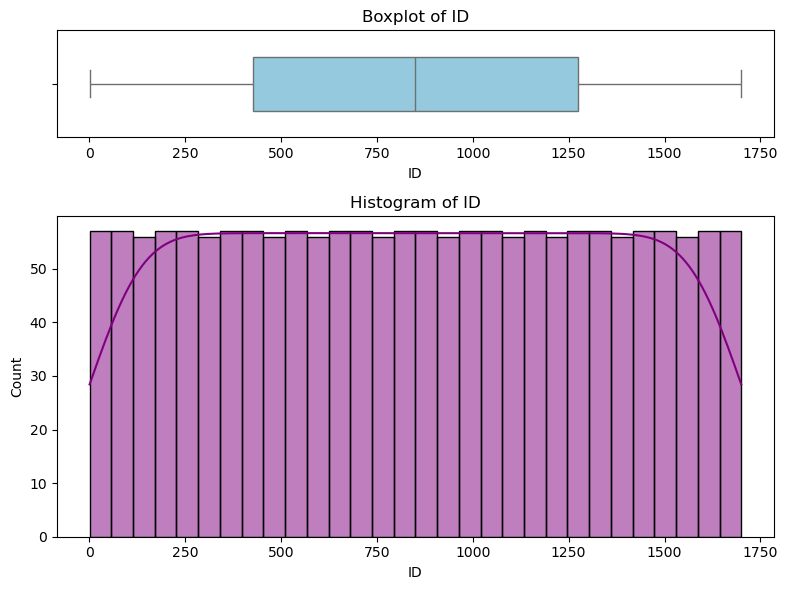

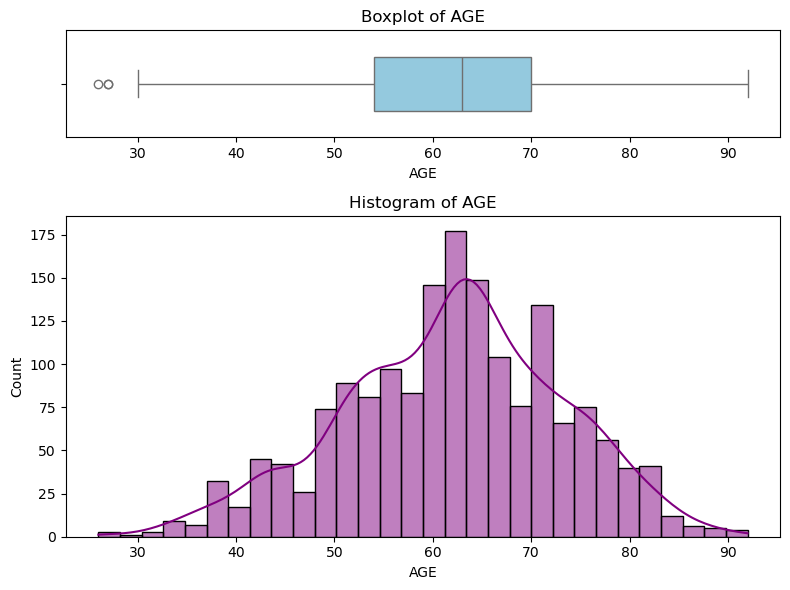

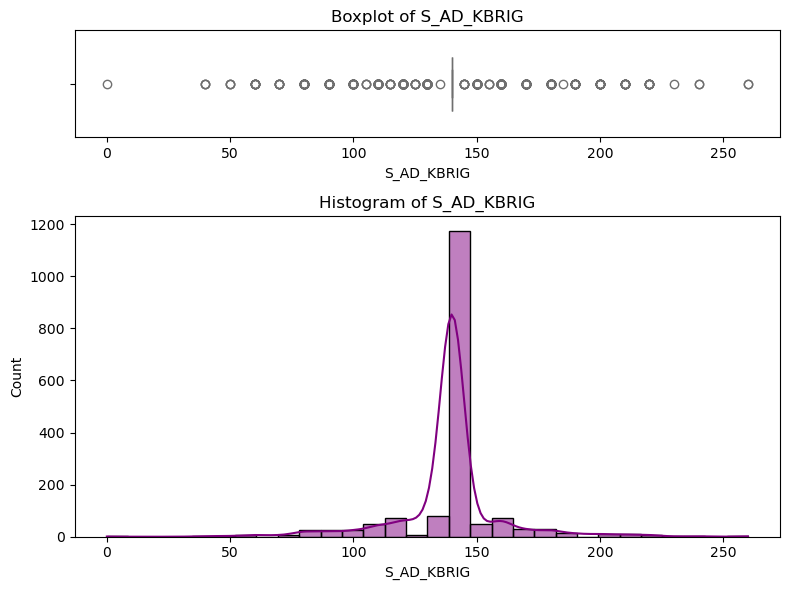

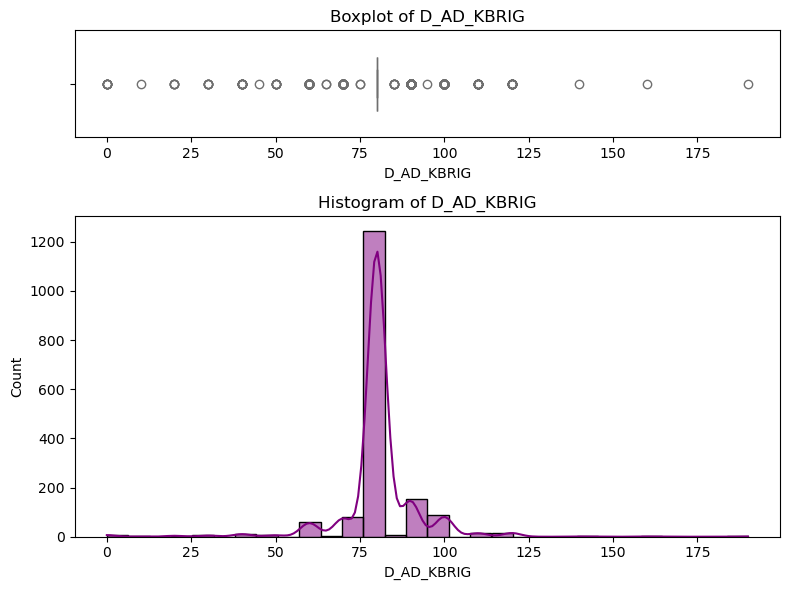

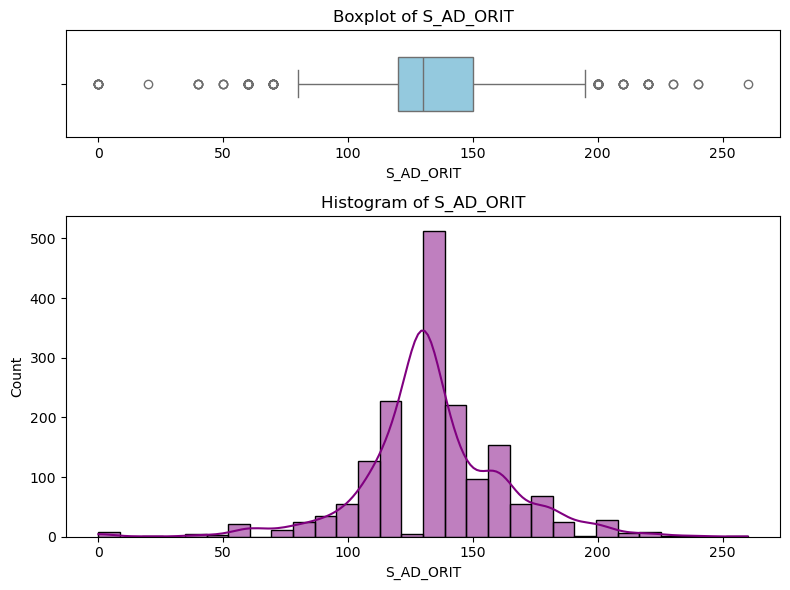

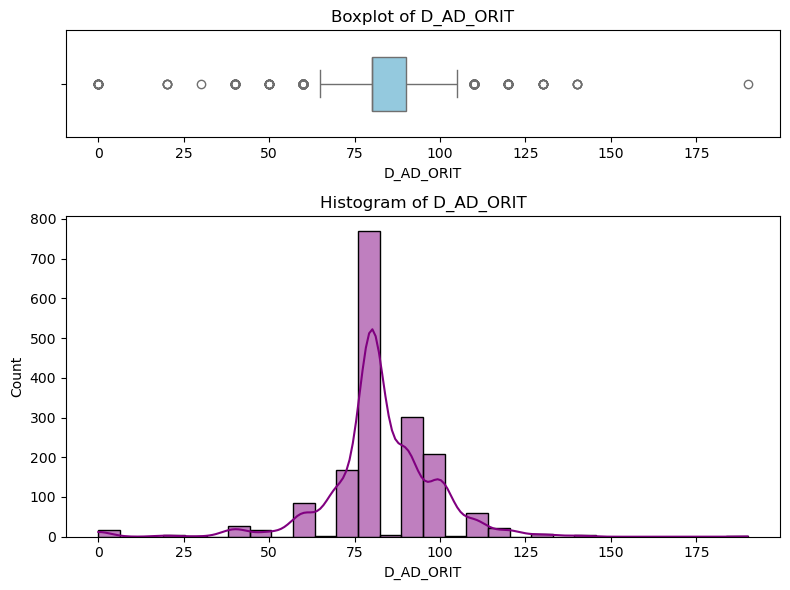

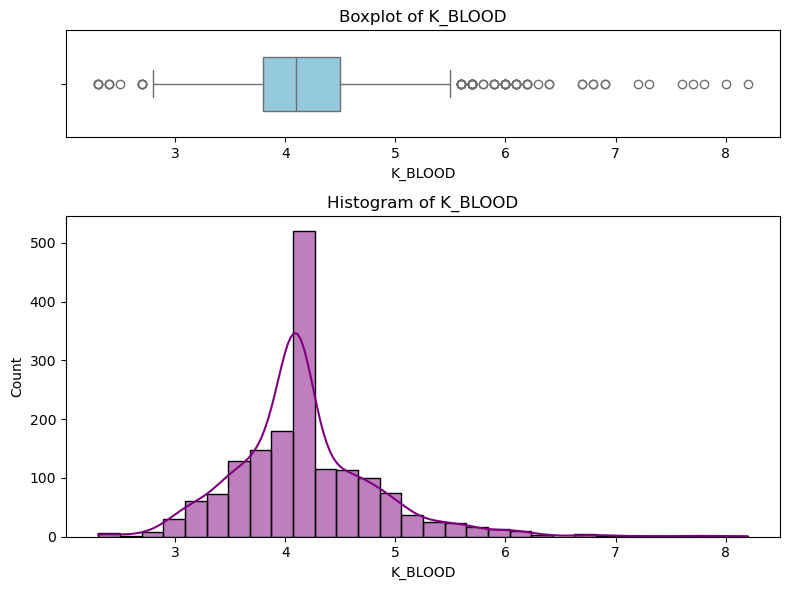

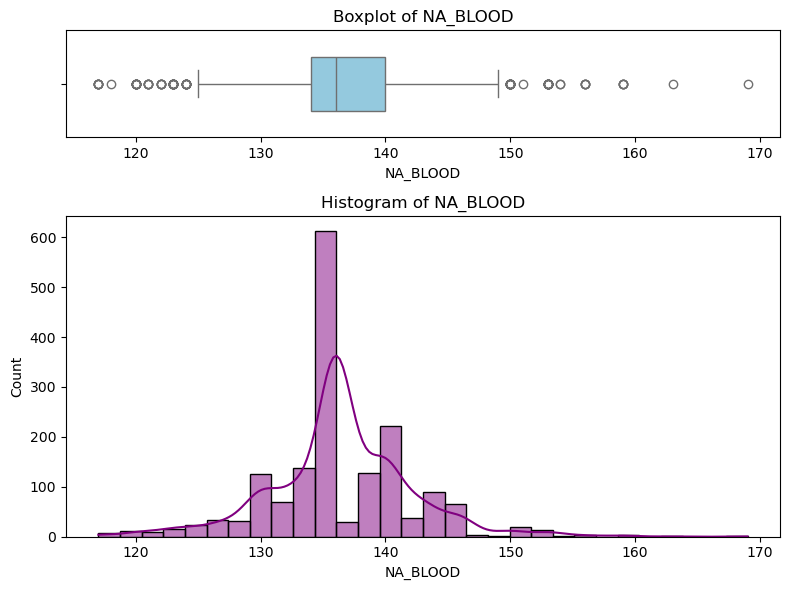

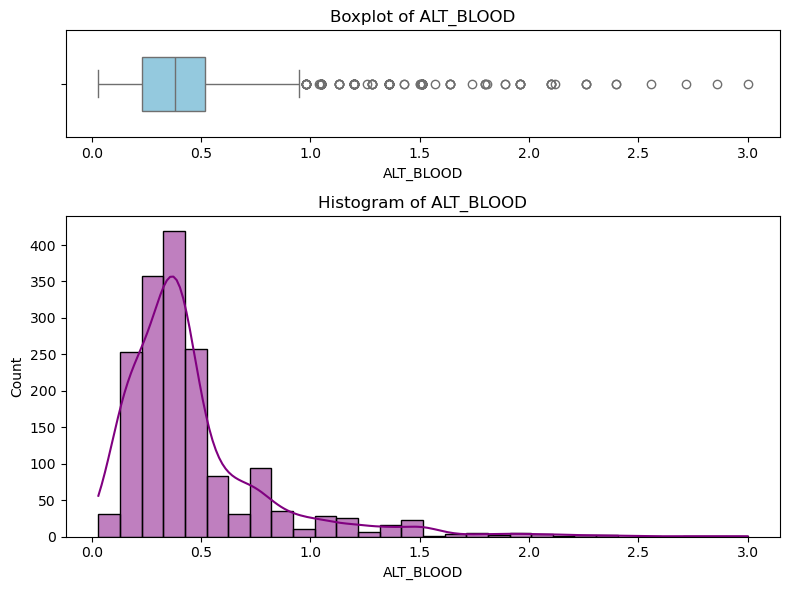

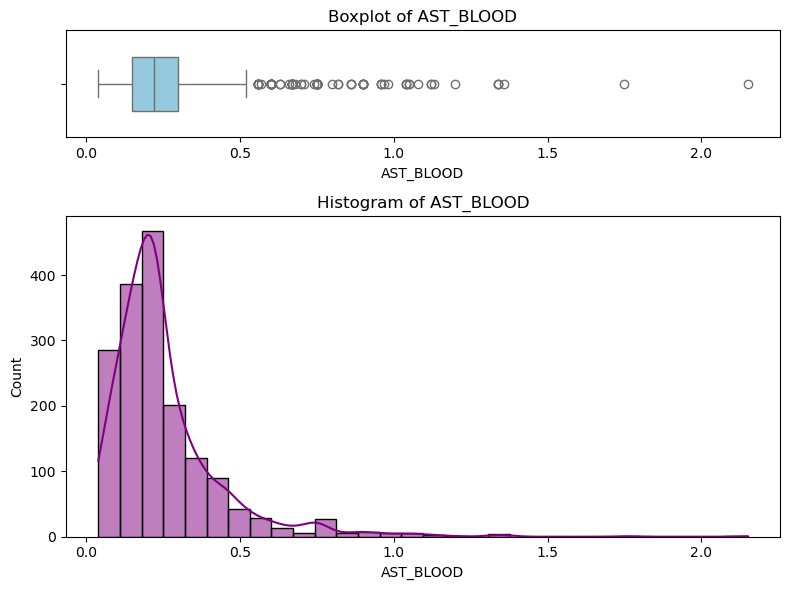

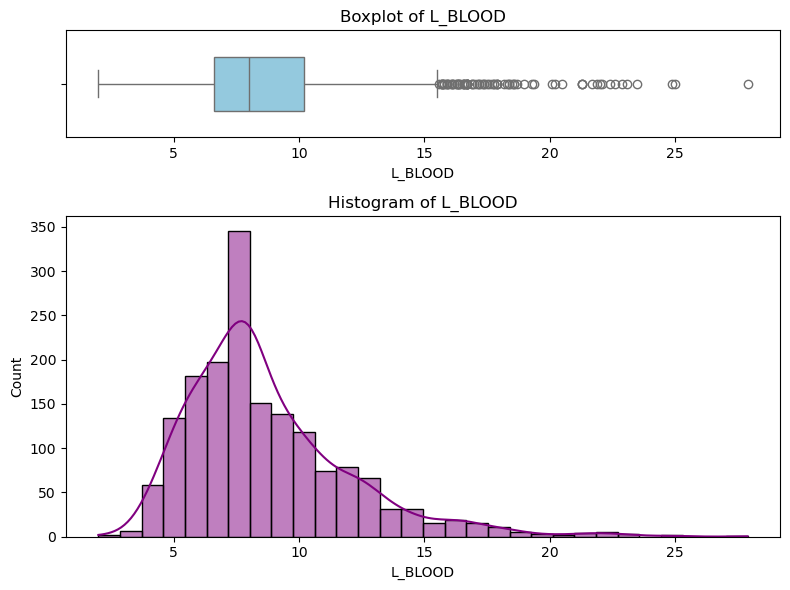

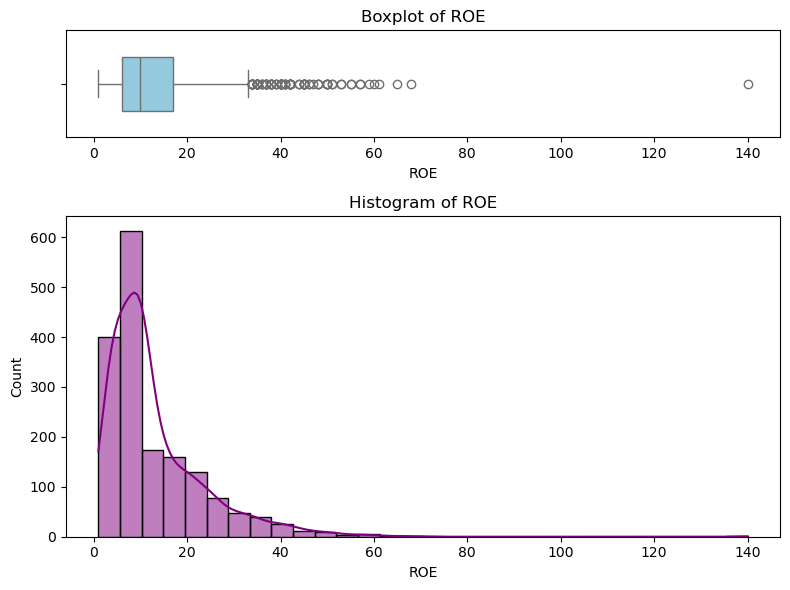

In [64]:
# Plot boxplot & histogram for continuous variables
for col in continuous_cols:
    fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})
    
    # Boxplot
    sns.boxplot(data=df[col], ax=axes[0], color='skyblue', width=0.5, orient='h')
    axes[0].set_title(f"Boxplot of {col}")
    
    # Histogram with KDE
    sns.histplot(df[col], kde=True, ax=axes[1], color='purple', bins=30)
    axes[1].set_title(f"Histogram of {col}")

    # Adjust layout
    plt.tight_layout()
    plt.show()


###  Train the Decision Tree Model

In [66]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

###  Plot the Decision Tree


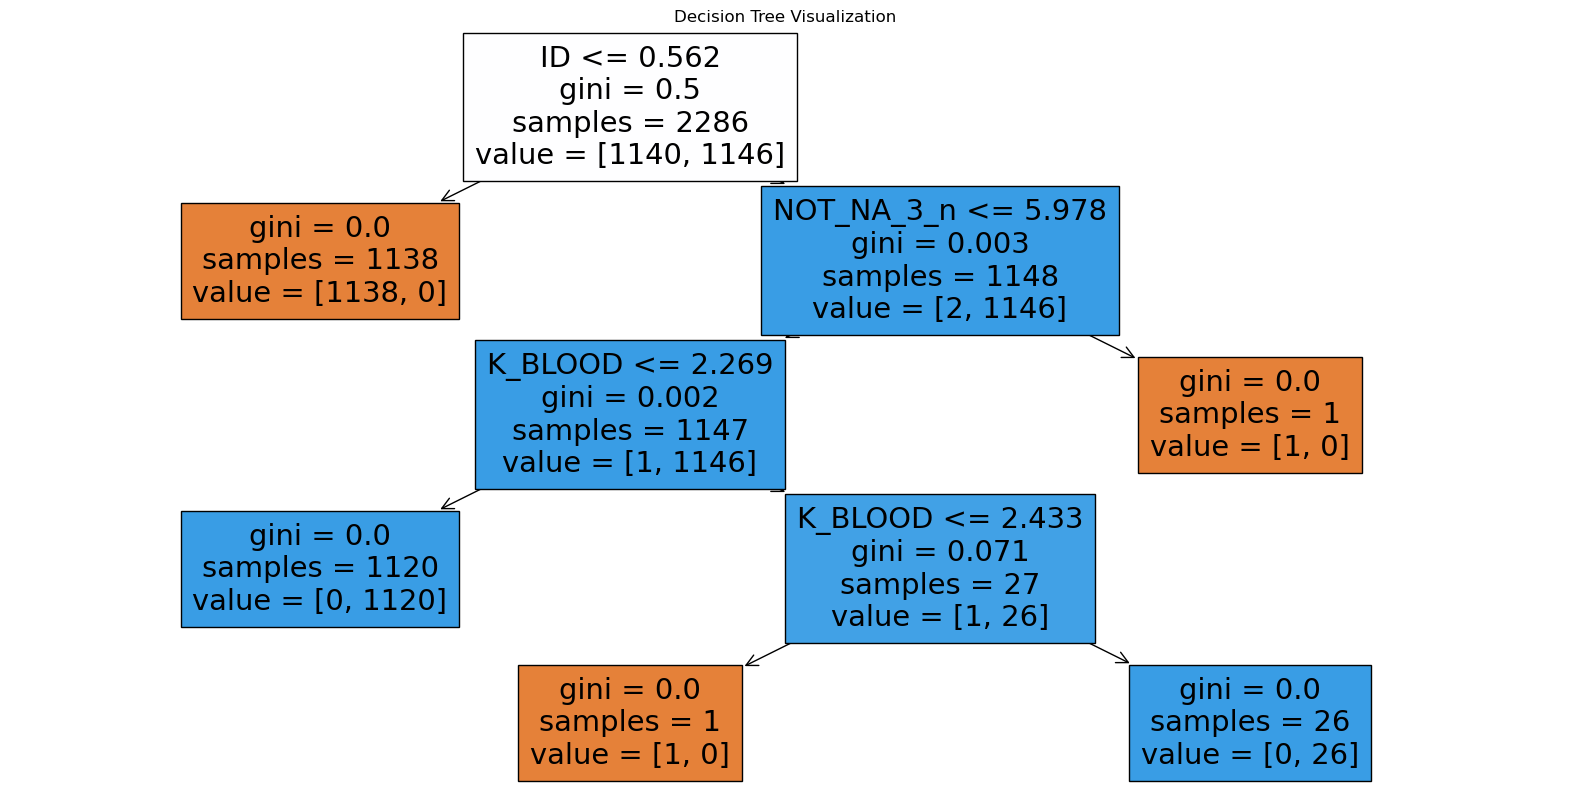

In [68]:
# Visualizing the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


### Print All Missing Values in a List

In [70]:
# Identify columns with missing values and their counts
missing_values = {col: df[col].isnull().sum() for col in df.columns if df[col].isnull().sum() > 0}

# Print missing values in a list format
if missing_values:
    print("Columns with missing values and their count:")
    for col, count in missing_values.items():
        print(f"{col}: {count} missing values")
else:
    print("No missing values found in the dataset.")


No missing values found in the dataset.


In [71]:
# Load the dataset
file_path = "Myocardial Infarction.csv"
df = pd.read_csv(file_path)

# Initialize an empty list to store column names with null values
null_columns = []

# Loop through each column and check for null values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        null_columns.append(col)

# Print the list of columns with null values
print("Columns with null values:", null_columns)

Columns with null values: ['AGE', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_

In [171]:
# Train Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_test_acc = accuracy_score(y_test, rf_model.predict(X_test))

# Train XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_test_acc = accuracy_score(y_test, xgb_model.predict(X_test))

C:\Users\akula\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:47:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [173]:
import pickle

# Select the best model based on test accuracy
best_model = "Random Forest" if rf_test_acc > xgb_test_acc else "XGBoost"
best_model_obj = rf_model if best_model == "Random Forest" else xgb_model

# Save the best model
with open("model.pkl", "wb") as f:
    pickle.dump(best_model_obj, f)

print(f"Best model ({best_model}) saved successfully as model.pkl")


Best model (XGBoost) saved successfully as model.pkl
